# **Airtel Stock Prices Prediction**

Models: 
1. Model Based Forecasting models like linear, exponential, 
Quadratic
2. Persistence/Base model

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Base packages
import pandas as pd
import numpy as np

# Visualization Packages
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

# Linear Regression
import statsmodels.formula.api as smf

In [3]:
# Read csv file
df_stock = pd.read_csv('BHARTIAIRTEL.csv')
df_stock.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,04-Nov-22,818.65,815.70,821.80,809.20,816.10,816.40,814.59,3768226,3.069542e+09,90470,2243180,59.53
1,BHARTIARTL,BL,03-Nov-22,802.10,809.85,809.85,809.85,809.85,809.85,809.85,3400871,2.754195e+09,1,-,-
2,BHARTIARTL,EQ,03-Nov-22,809.85,809.75,824.40,804.20,817.50,818.65,817.78,5897840,4.823129e+09,160802,3380905,57.32
3,BHARTIARTL,EQ,31-Oct-22,816.85,823.00,833.80,820.00,832.00,832.00,829.27,5487233,4.550408e+09,166517,3411499,62.17
4,BHARTIARTL,EQ,28-Oct-22,817.10,819.00,824.40,811.30,819.50,816.85,816.70,3905093,3.189280e+09,106794,1890500,67.1


**Exploratory Data Analysis (EDA)**

In [4]:
df_stock.shape

(1743, 15)

In [5]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  1743 non-null   object 
 1   Series                  1743 non-null   object 
 2   Date                    1743 non-null   object 
 3   Prev Close              1743 non-null   float64
 4   Open Price              1743 non-null   float64
 5   High Price              1743 non-null   float64
 6   Low Price               1743 non-null   float64
 7   Last Price              1743 non-null   float64
 8   Close Price             1743 non-null   float64
 9   Average Price           1743 non-null   float64
 10  Total Traded Quantity   1743 non-null   int64  
 11  Turnover                1743 non-null   float64
 12  No. of Trades           1743 non-null   int64  
 13  Deliverable Qty         1743 non-null   object 
 14  % Dly Qt to Traded Qty  1743 non-null   

Insights: 1. No null values in the dataset. 
2. Need to remove Series values other than 'EQ'
3. Need to remove columns which are not useful for price predictions i.e. remove columns other than 'Date' and 'Close Price'
4. 'Close Price' column to be renamed to 'Close_Price'
5. Date column type to be changed from object to Date 
5. Sort data in ascending order of date
6. Set Date column as new index

In [6]:
# Dropping all Series column values which are not equal to 'EQ'
values=['EQ']
df_stock = df_stock[df_stock['Series'].isin(values)]

In [7]:
df_stock = df_stock[['Date', 'Close Price' ]]

In [8]:
# Renaming of column name 'Close Price'
df_stock = df_stock.rename(columns={'Close Price': 'Close_Price'})
df_stock.head()

,Date,Close_Price
0,04-Nov-22,816.40
2,03-Nov-22,818.65
3,31-Oct-22,832.00
4,28-Oct-22,816.85
5,27-Oct-22,817.10


In [9]:
df_stock.nunique()

Date           1726
Close_Price    1492
dtype: int64

In [10]:
# Find all duplicate rows
df_stock[df_stock.duplicated()]

,Date,Close_Price
756,04-Nov-19,378.00
1498,03-Nov-16,308.95
1500,02-Nov-16,309.60
1502,01-Nov-16,317.45


In [11]:
# Remove duplicate rows
df_stock = df_stock.drop_duplicates()
df_stock.nunique()

Date           1726
Close_Price    1492
dtype: int64

In [12]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock.head()

,Date,Close_Price
0,2022-11-04,816.40
2,2022-11-03,818.65
3,2022-10-31,832.00
4,2022-10-28,816.85
5,2022-10-27,817.10


In [13]:
# Set Date column as index 
df_stock=df_stock.set_index(pd.DatetimeIndex(df_stock['Date']))
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1726 entries, 2022-11-04 to 2015-11-09
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1726 non-null   datetime64[ns]
 1   Close_Price  1726 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.5 KB


In [14]:
# Sort index in ascending order
df_stock = df_stock.sort_index(ascending=True)
df_stock.head()

,Date,Close_Price
Date,,
2015-11-09,2015-11-09,335.25
2015-11-10,2015-11-10,331.65
2015-11-11,2015-11-11,331.90
2015-11-13,2015-11-13,333.90
2015-11-16,2015-11-16,335.75


In [15]:
# Providing data range for understanding
print(f'Dataframe contains stock prices between {df_stock.Date.min().strftime("%Y-%m-%d")} and {df_stock.Date.max().strftime("%Y-%m-%d")}')
print(f'Total days {(df_stock.Date.max() - df_stock.Date.min()).days} days')

Dataframe contains stock prices between 2015-11-09 and 2022-11-04
Total days 2552 days


In [16]:
df_stock['Date']= pd.to_datetime(df_stock["Date"]).dt.strftime("%Y%m%d")
df_stock.head()

,Date,Close_Price
Date,,
2015-11-09,20151109,335.25
2015-11-10,20151110,331.65
2015-11-11,20151111,331.90
2015-11-13,20151113,333.90
2015-11-16,20151116,335.75


In [17]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1726 entries, 2015-11-09 to 2022-11-04
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1726 non-null   object 
 1   Close_Price  1726 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.5+ KB


In [18]:
# Convert Date column to integer
df_stock['Date'] = df_stock['Date'].astype('int64')

In [19]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1726 entries, 2015-11-09 to 2022-11-04
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1726 non-null   int64  
 1   Close_Price  1726 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.5 KB


**Finding Outliers and Treatment**

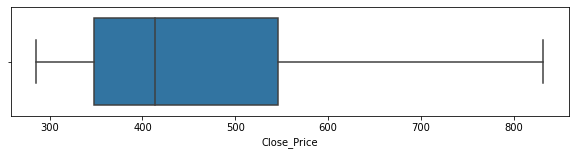

In [20]:
# Boxplot
plt.figure(figsize=(10,2))
ax = sns.boxplot(x=df_stock['Close_Price'],whis=1.5,data=df_stock)

Insight: No outliers in the dataset

**Data Visualizations**

**Histogram**

<Figure size 576x288 with 0 Axes>

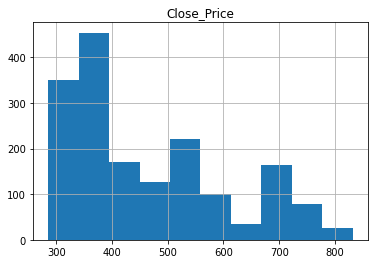

In [21]:
plt.figure(figsize=(8,4))
df_stock.hist("Close_Price")
plt.show()

**Density Plot**

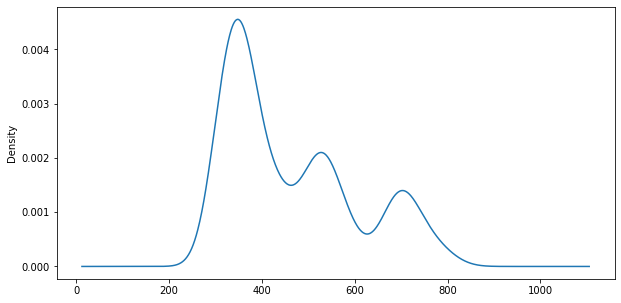

In [22]:
plt.figure(figsize=(10,5))
df_stock["Close_Price"].plot(kind='kde')
plt.show()

**Scatter Plot**

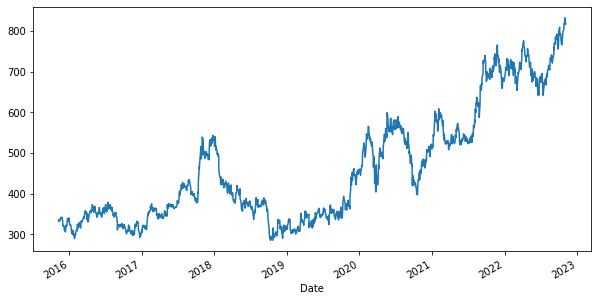

In [23]:
plt.figure(figsize=(10,5))
df_stock['Close_Price'].plot()
plt.show()

Insight: Trend is upword or positive. Seasonality can be observed slightly.

**Correlation between variables**

In [24]:
df_stock.corr()

,Date,Close_Price
Date,1.000000,0.830831
Close_Price,0.830831,1.000000


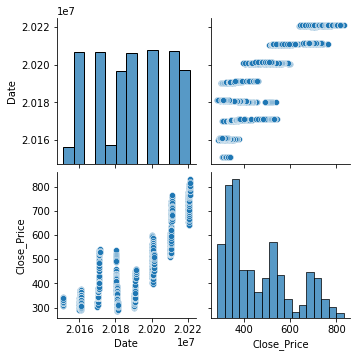

In [25]:
sns.pairplot(df_stock)

## **Model Based Forecasting**

In [26]:
# Create a new column with serial number to use in forecasting
df_stock['t'] = range(1, 1+len(df_stock))
df_stock.head()

,Date,Close_Price,t
Date,,,
2015-11-09,20151109,335.25,1
2015-11-10,20151110,331.65,2
2015-11-11,20151111,331.90,3
2015-11-13,20151113,333.90,4
2015-11-16,20151116,335.75,5


In [27]:
df_stock.tail()

,Date,Close_Price,t
Date,,,
2022-10-27,20221027,817.10,1722
2022-10-28,20221028,816.85,1723
2022-10-31,20221031,832.00,1724
2022-11-03,20221103,818.65,1725
2022-11-04,20221104,816.40,1726


In [28]:
# Add t Squared column and log of Sales column
df_stock['log_Close_Price'] = np.log10(df_stock['Close_Price'])
df_stock['t_square'] = np.square(df_stock['t'])
df_stock.head()

,Date,Close_Price,t,log_Close_Price,t_square
Date,,,,,
2015-11-09,20151109,335.25,1,2.525369,1
2015-11-10,20151110,331.65,2,2.520680,4
2015-11-11,20151111,331.90,3,2.521007,9
2015-11-13,20151113,333.90,4,2.523616,16
2015-11-16,20151116,335.75,5,2.526016,25


In [29]:
# Split data into train and test data
n=19
df_stock_train = df_stock.head(len(df_stock)-n)
df_stock_test = df_stock.tail(n)
print(df_stock_train.info())
print(df_stock_test.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1707 entries, 2015-11-09 to 2022-10-04
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1707 non-null   int64  
 1   Close_Price      1707 non-null   float64
 2   t                1707 non-null   int64  
 3   log_Close_Price  1707 non-null   float64
 4   t_square         1707 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 80.0 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 2022-10-06 to 2022-11-04
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             19 non-null     int64  
 1   Close_Price      19 non-null     float64
 2   t                19 non-null     int64  
 3   log_Close_Price  19 non-null     float64
 4   t_square         19 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 912.0 bytes

### **Linear Regression Model**

In [30]:
linear_model = smf.ols('Close_Price ~ t', data=df_stock_train).fit()

pred_linear = linear_model.predict(df_stock_test['t'])
pred_linear.head()

Date
2022-10-06    656.059769
2022-10-07    656.290753
2022-10-10    656.521737
2022-10-11    656.752721
2022-10-12    656.983706
dtype: float64

In [31]:
df_stock_test.head()

,Date,Close_Price,t,log_Close_Price,t_square
Date,,,,,
2022-10-06,20221006,788.60,1708,2.896857,2917264
2022-10-07,20221007,793.10,1709,2.899328,2920681
2022-10-10,20221010,792.35,1710,2.898917,2924100
2022-10-11,20221011,780.30,1711,2.892262,2927521
2022-10-12,20221012,775.55,1712,2.889610,2930944


**Evaluation of Model**

In [32]:
pred_linear

Date
2022-10-06    656.059769
2022-10-07    656.290753
2022-10-10    656.521737
2022-10-11    656.752721
2022-10-12    656.983706
2022-10-13    657.214690
2022-10-14    657.445674
2022-10-17    657.676659
2022-10-18    657.907643
2022-10-19    658.138627
2022-10-20    658.369612
2022-10-21    658.600596
2022-10-24    658.831580
2022-10-25    659.062564
2022-10-27    659.293549
2022-10-28    659.524533
2022-10-31    659.755517
2022-11-03    659.986502
2022-11-04    660.217486
dtype: float64

In [33]:
mse = mean_squared_error(df_stock_test['Close_Price'],pred_linear )
rmse_linear = mse**.5
print(mse)
print(rmse_linear)

18880.079404581065
137.404801242828


**Understanding the predictions by charts**


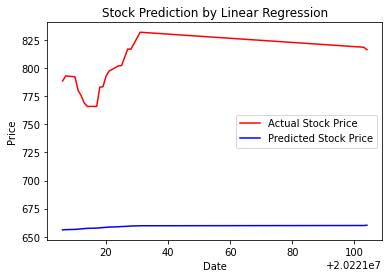

In [34]:
plt.plot(df_stock_test['Date'], df_stock_test['Close_Price'], color='red', label='Actual Stock Price')
plt.plot(df_stock_test['Date'], pred_linear, color='blue', label='Predicted Stock Price')
plt.title('Stock Prediction by Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### **Exponential Model**

In [35]:
exp_model = smf.ols('log_Close_Price ~ t', data = df_stock_train).fit()
pred_exp_log = exp_model.predict(df_stock_test['t'])
pred_exp_log.head()

Date
2022-10-06    2.820327
2022-10-07    2.820534
2022-10-10    2.820741
2022-10-11    2.820948
2022-10-12    2.821155
dtype: float64

**Evaluation of Model**

In [36]:
pred_exp = 10 ** pred_exp_log
pred_exp

Date
2022-10-06    661.190972
2022-10-07    661.506097
2022-10-10    661.821372
2022-10-11    662.136797
2022-10-12    662.452373
2022-10-13    662.768099
2022-10-14    663.083976
2022-10-17    663.400003
2022-10-18    663.716181
2022-10-19    664.032509
2022-10-20    664.348989
2022-10-21    664.665619
2022-10-24    664.982400
2022-10-25    665.299332
2022-10-27    665.616415
2022-10-28    665.933649
2022-10-31    666.251034
2022-11-03    666.568571
2022-11-04    666.886259
dtype: float64

In [37]:
mse = mean_squared_error(df_stock_test['Close_Price'],pred_exp )
rmse_exp = mse**.5
print(mse)
print(rmse_exp)

17296.467493915396
131.51603512087564


**Understanding the predictions by charts**


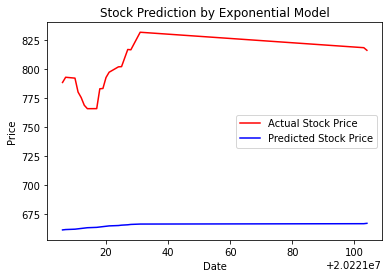

In [38]:
plt.plot(df_stock_test['Date'], df_stock_test['Close_Price'], color='red', label='Actual Stock Price')
plt.plot(df_stock_test['Date'], pred_exp, color='blue', label='Predicted Stock Price')
plt.title('Stock Prediction by Exponential Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### **Quadratic Model**

In [39]:
# Create model
quad_model = smf.ols('Close_Price ~ t + t_square ', data = df_stock_train).fit()
pred_quad = quad_model.predict(df_stock_test[['t', 't_square']])

**Evaluation of Model**

In [40]:
# Prediction Values
pred_quad

Date
2022-10-06    764.498864
2022-10-07    765.110782
2022-10-10    765.723146
2022-10-11    766.335955
2022-10-12    766.949210
2022-10-13    767.562911
2022-10-14    768.177058
2022-10-17    768.791651
2022-10-18    769.406689
2022-10-19    770.022174
2022-10-20    770.638104
2022-10-21    771.254480
2022-10-24    771.871301
2022-10-25    772.488569
2022-10-27    773.106282
2022-10-28    773.724441
2022-10-31    774.343046
2022-11-03    774.962096
2022-11-04    775.581593
dtype: float64

In [41]:
mse = mean_squared_error(df_stock_test['Close_Price'],pred_quad )
rmse_quad = mse**.5
print(mse)
print(rmse_quad)

863.3293688262742
29.382467030974002


**Understanding the predictions by charts**


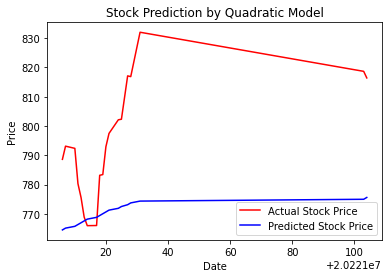

In [42]:
plt.plot(df_stock_test['Date'], df_stock_test['Close_Price'], color='red', label='Actual Stock Price')
plt.plot(df_stock_test['Date'], pred_quad, color='blue', label='Predicted Stock Price')
plt.title('Stock Prediction by Quadratic Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## **Persistence/Base and Arima Models**

### **Persistence/Base Model**

In [43]:
num_shift=5
df_stock['Close_Price_minus_5'] = df_stock['Close_Price'].shift(num_shift)
df_stock.head()

,Date,Close_Price,t,log_Close_Price,t_square,Close_Price_minus_5
Date,,,,,,
2015-11-09,20151109,335.25,1,2.525369,1,NaN
2015-11-10,20151110,331.65,2,2.520680,4,NaN
2015-11-11,20151111,331.90,3,2.521007,9,NaN
2015-11-13,20151113,333.90,4,2.523616,16,NaN
2015-11-16,20151116,335.75,5,2.526016,25,NaN


**Evaluation of Model**

In [44]:
df_stock[['Date', 'Close_Price', 'Close_Price_minus_5']].tail(19)

,Date,Close_Price,Close_Price_minus_5
Date,,,
2022-10-06,20221006,788.60,761.45
2022-10-07,20221007,793.10,764.65
2022-10-10,20221010,792.35,799.90
2022-10-11,20221011,780.30,803.35
2022-10-12,20221012,775.55,808.70
2022-10-13,20221013,768.90,788.60
2022-10-14,20221014,765.95,793.10
2022-10-17,20221017,766.00,792.35
2022-10-18,20221018,783.15,780.30


In [45]:
mse = mean_squared_error(df_stock.iloc[num_shift:,1],df_stock.iloc[num_shift:, 5] )
rmse_base = mse**.5
print(mse)
print(rmse_base)

384.6090136548519
19.611451084885378


**Understanding the predictions by charts**


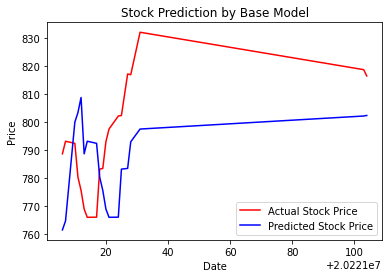

In [46]:
plt.plot(df_stock['Date'].tail(19), df_stock['Close_Price'].tail(19), color='red', label='Actual Stock Price')
plt.plot(df_stock['Date'].tail(19), df_stock['Close_Price_minus_5'].tail(19), color='blue', label='Predicted Stock Price')
plt.title('Stock Prediction by Base Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### **Comparing above results**

In [47]:
data = {'Model':['RMSE_Lin', 'RMSE_Exp', 'RMSE_Quad', 'RMSE_Base'],
        'RMSE_Value' : [rmse_linear, rmse_exp, rmse_quad, rmse_base]}

df_rmse = pd.DataFrame(data)
df_rmse

,Model,RMSE_Value
0,RMSE_Lin,137.404801
1,RMSE_Exp,131.516035
2,RMSE_Quad,29.382467
3,RMSE_Base,19.611451


Observation: Even though RMSE for Base model is least, this model is not reliable since it takes n days prior close_price as current days close price. So, comparing all these above models, Quadratic Model is good . 